In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flights_df = pd.read_csv('M1_final.csv')
flights_df['Dew Point'] = flights_df['Dew Point'].astype('int64')

In [2]:
pd.set_option('display.max_columns', None)

flights_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,1372,1427,39,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,1392,25,39,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,1408,1337,39,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,1422,261,39,38,96,N,6,0,30.18,Cloudy,19,23,13


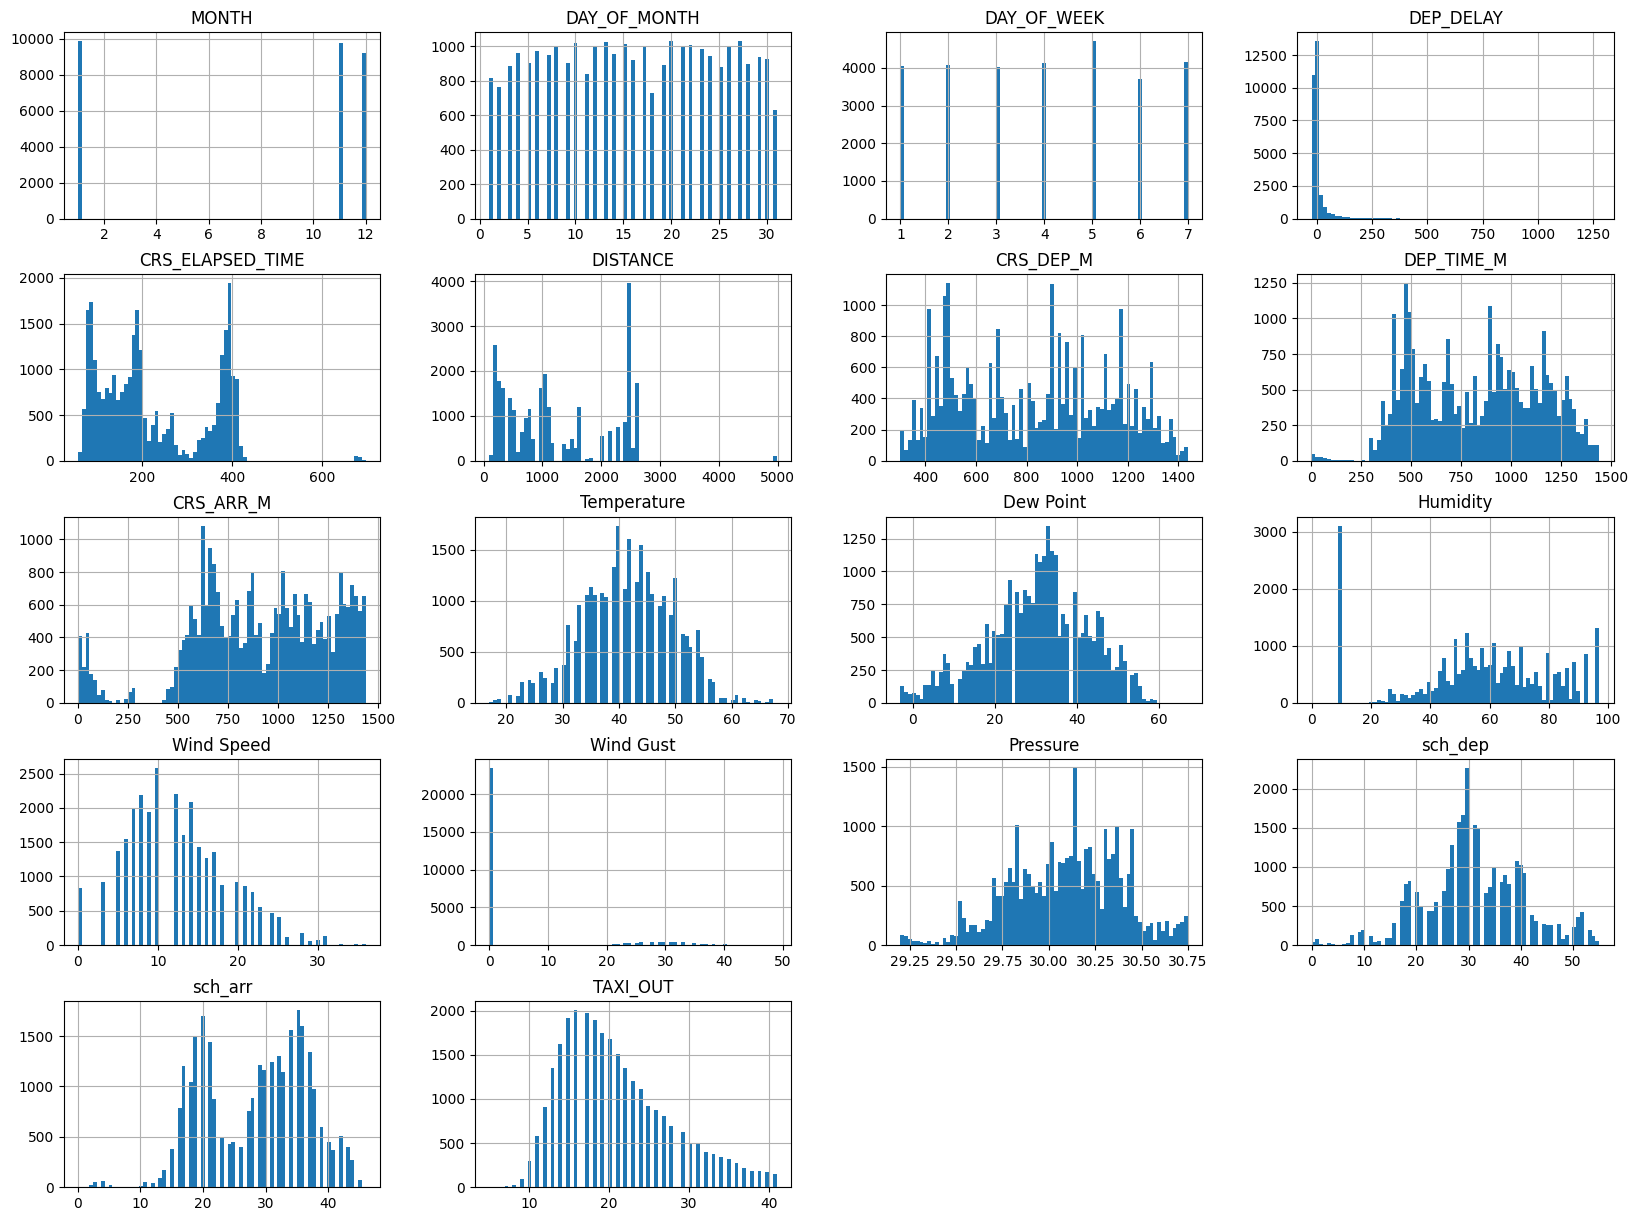

In [3]:
flights_df.hist(figsize=(20,15), bins=75)
plt.show()

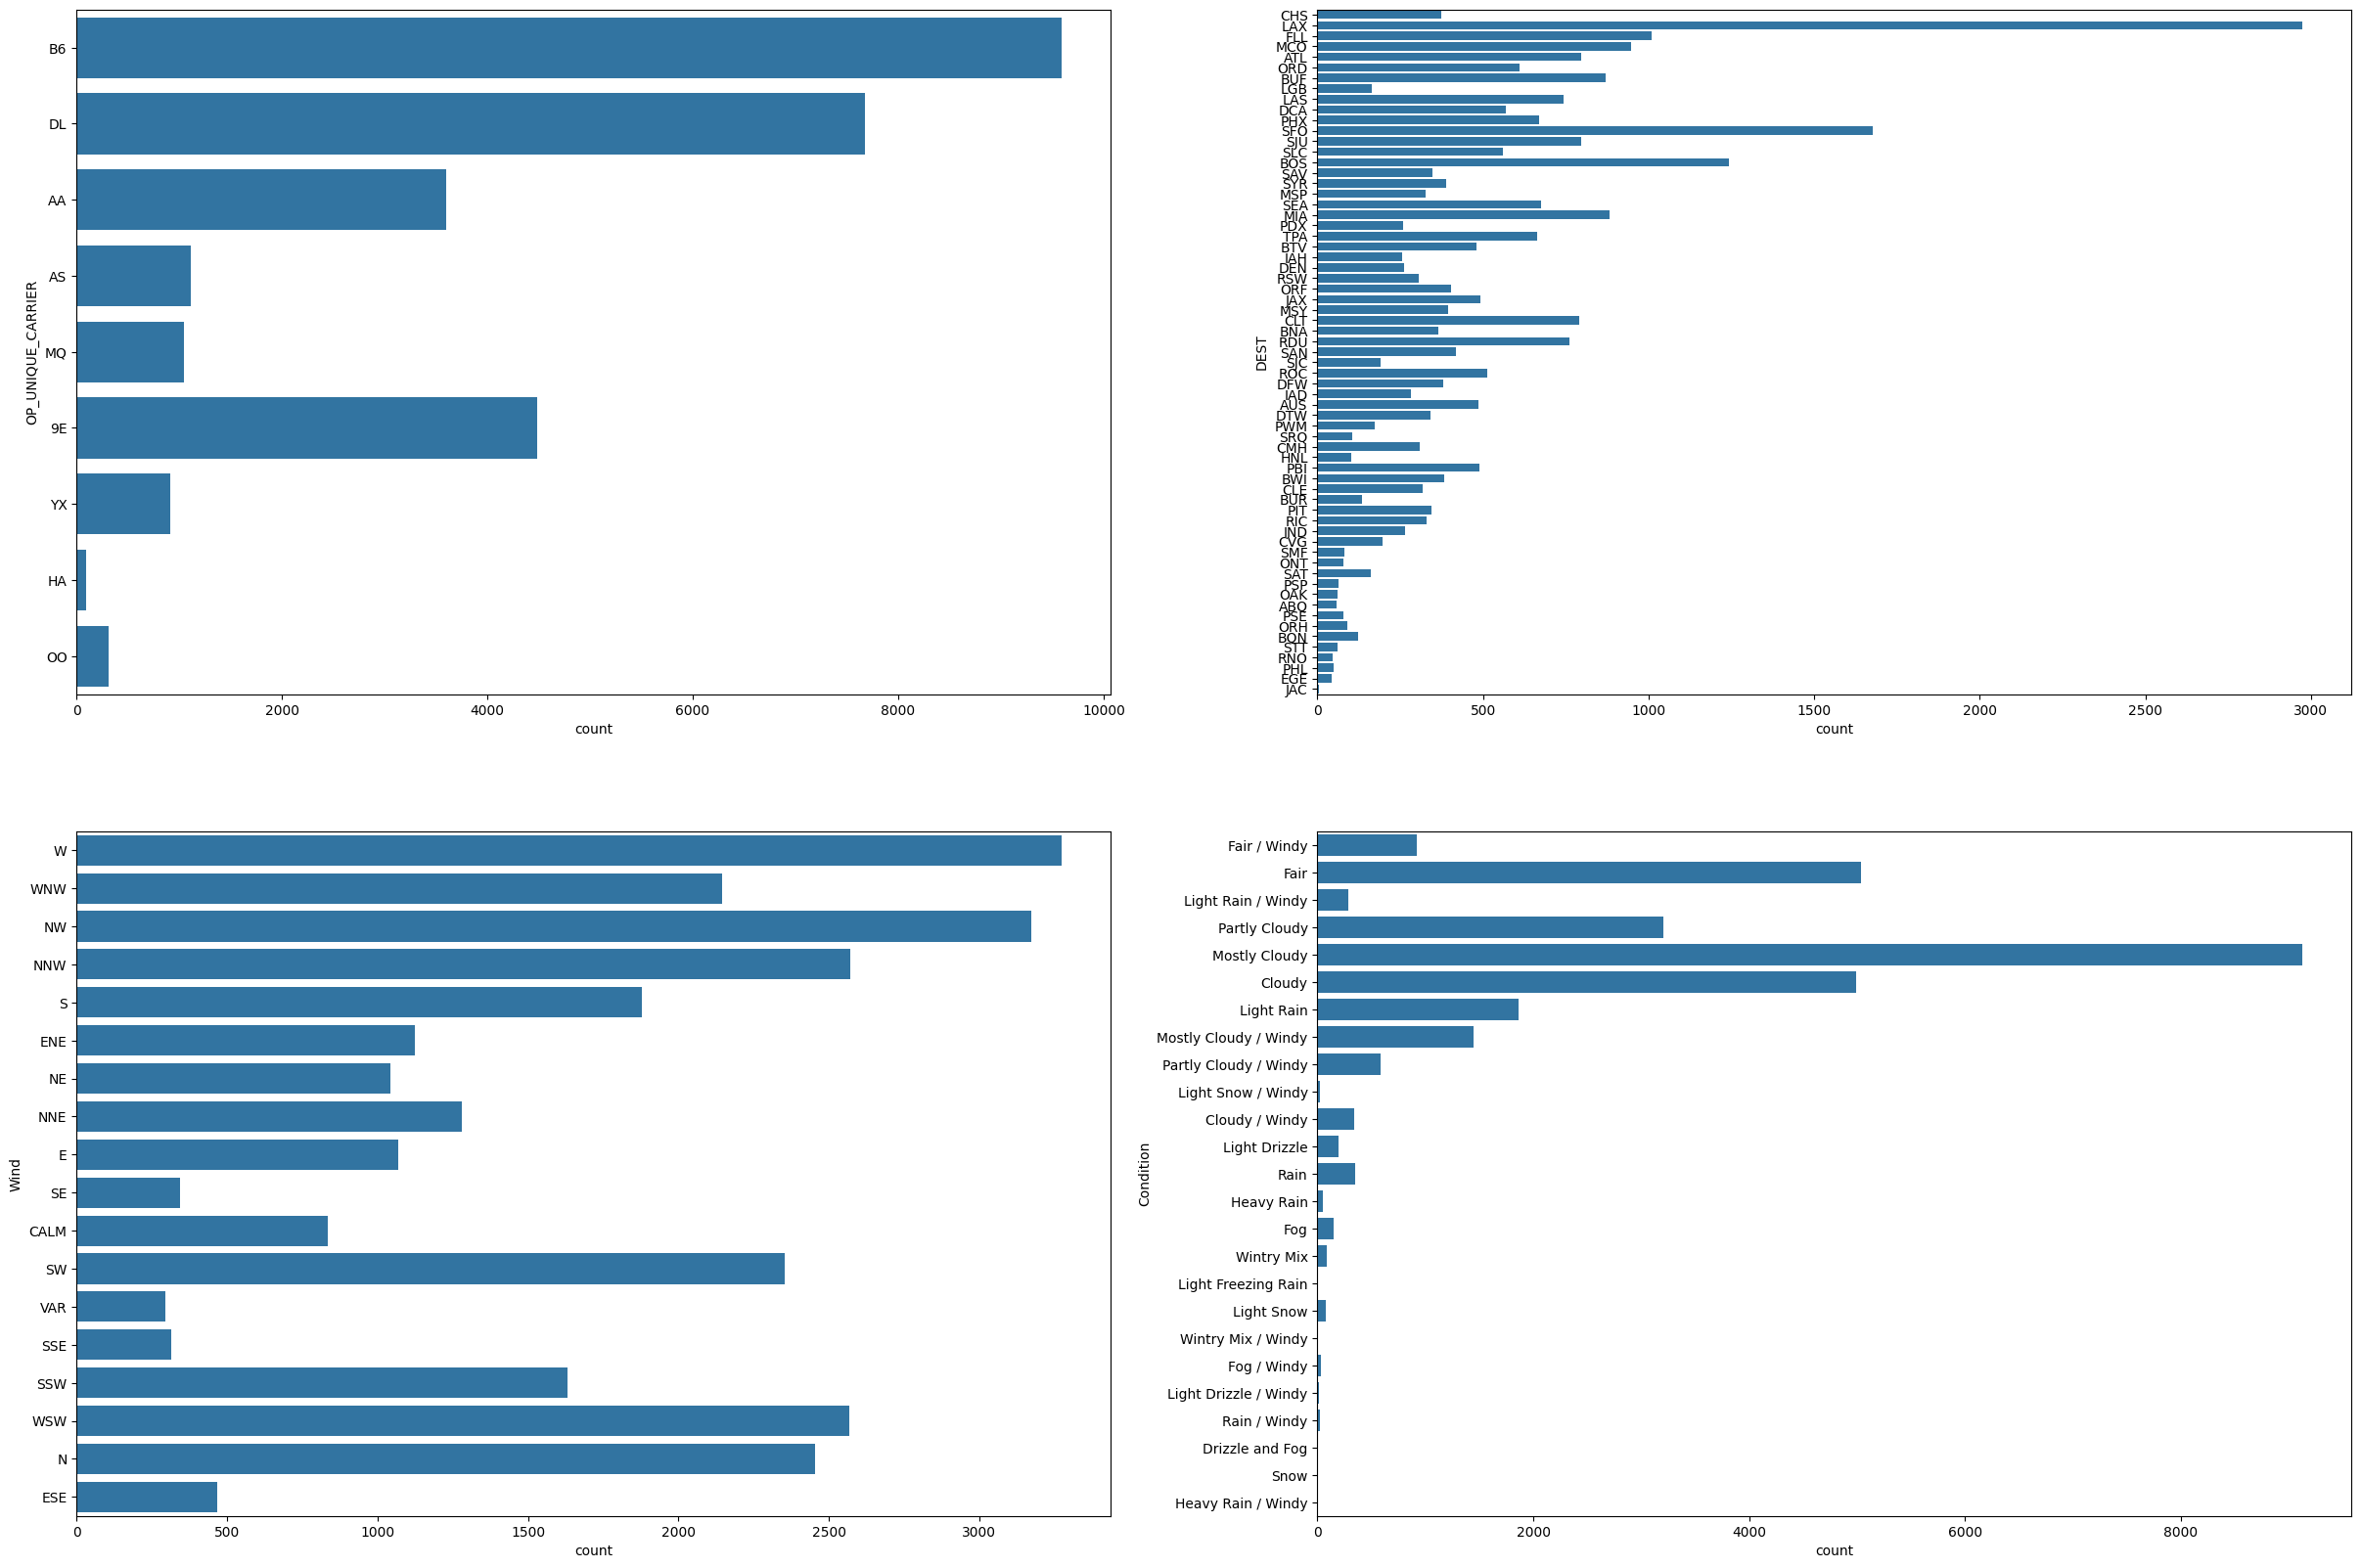

In [4]:
fig, ax = plt.subplots(2, 2, figsize = (30,20))

sns.countplot(flights_df['OP_UNIQUE_CARRIER'], ax=ax[0,0])
sns.countplot(flights_df['DEST'], ax=ax[0,1])
sns.countplot(flights_df['Wind'], ax=ax[1,0])
sns.countplot(flights_df['Condition'], ax=ax[1,1])
plt.show()

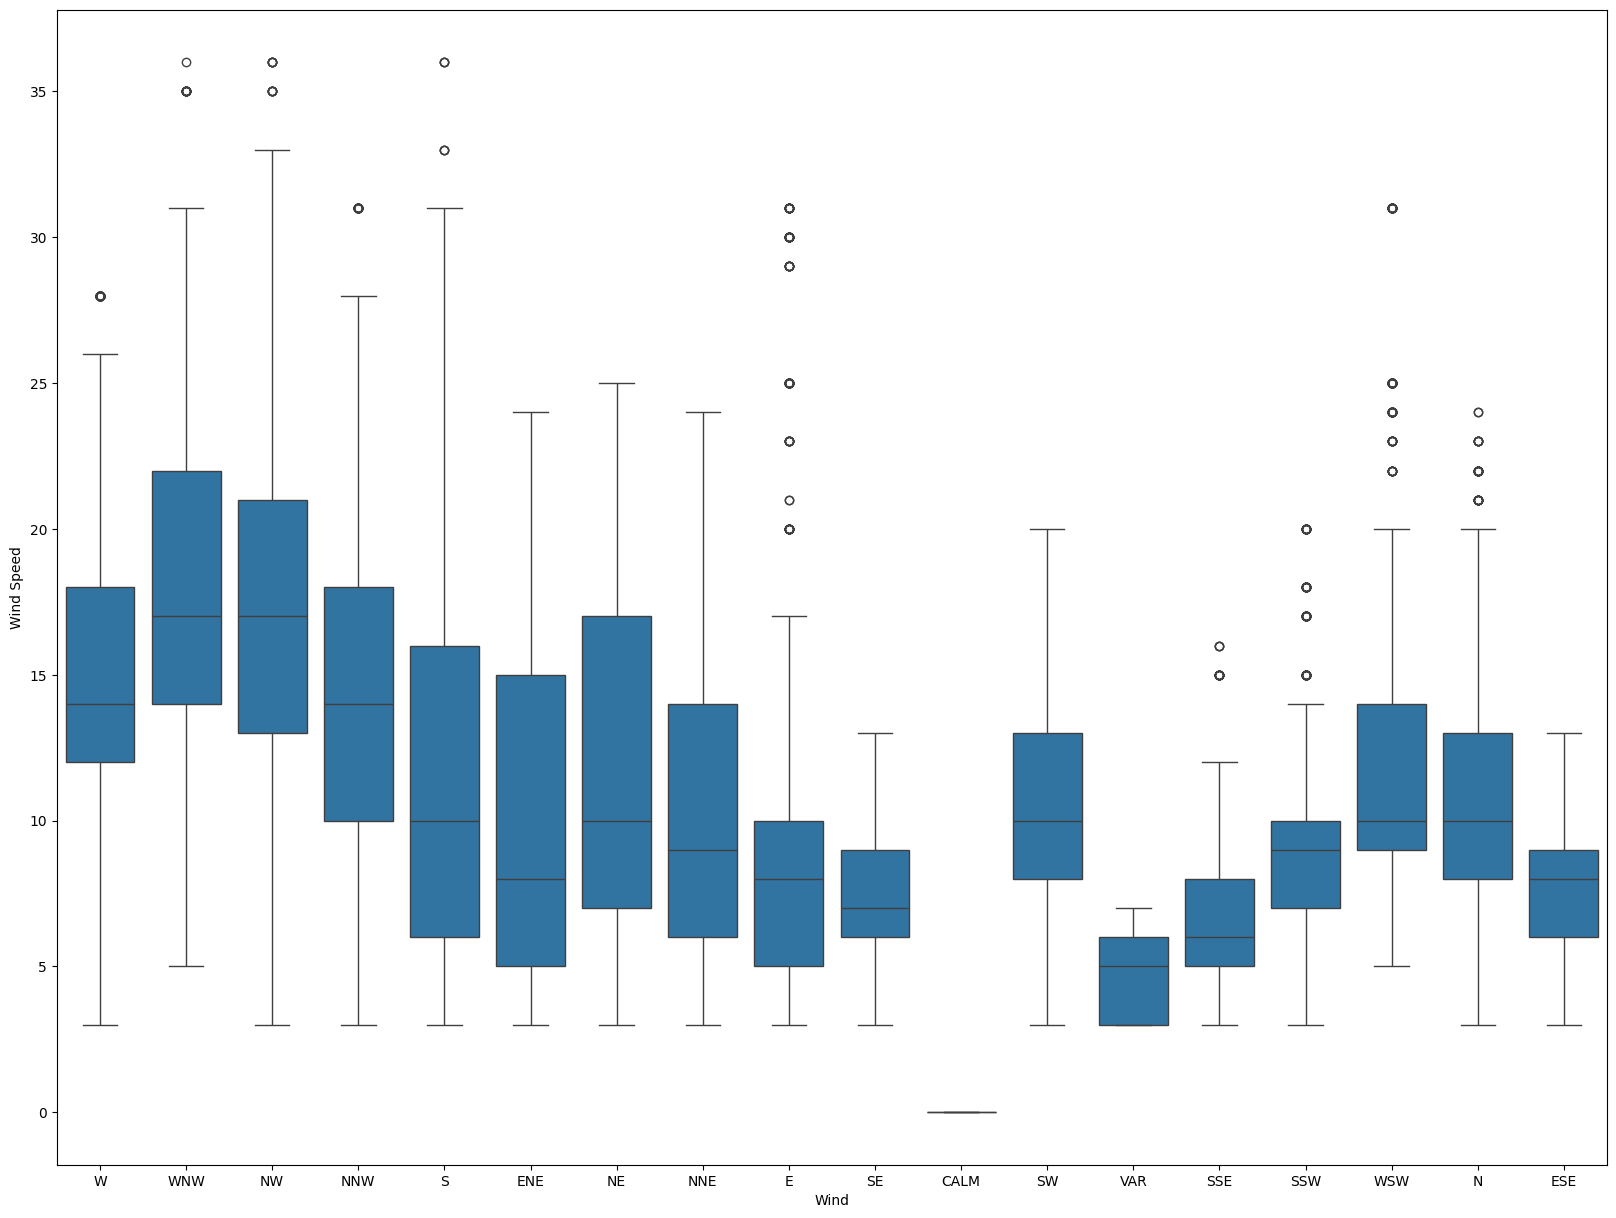

In [5]:
plt.figure(figsize=(20,15))
sns.boxplot(flights_df, x='Wind', y='Wind Speed')
plt.show()

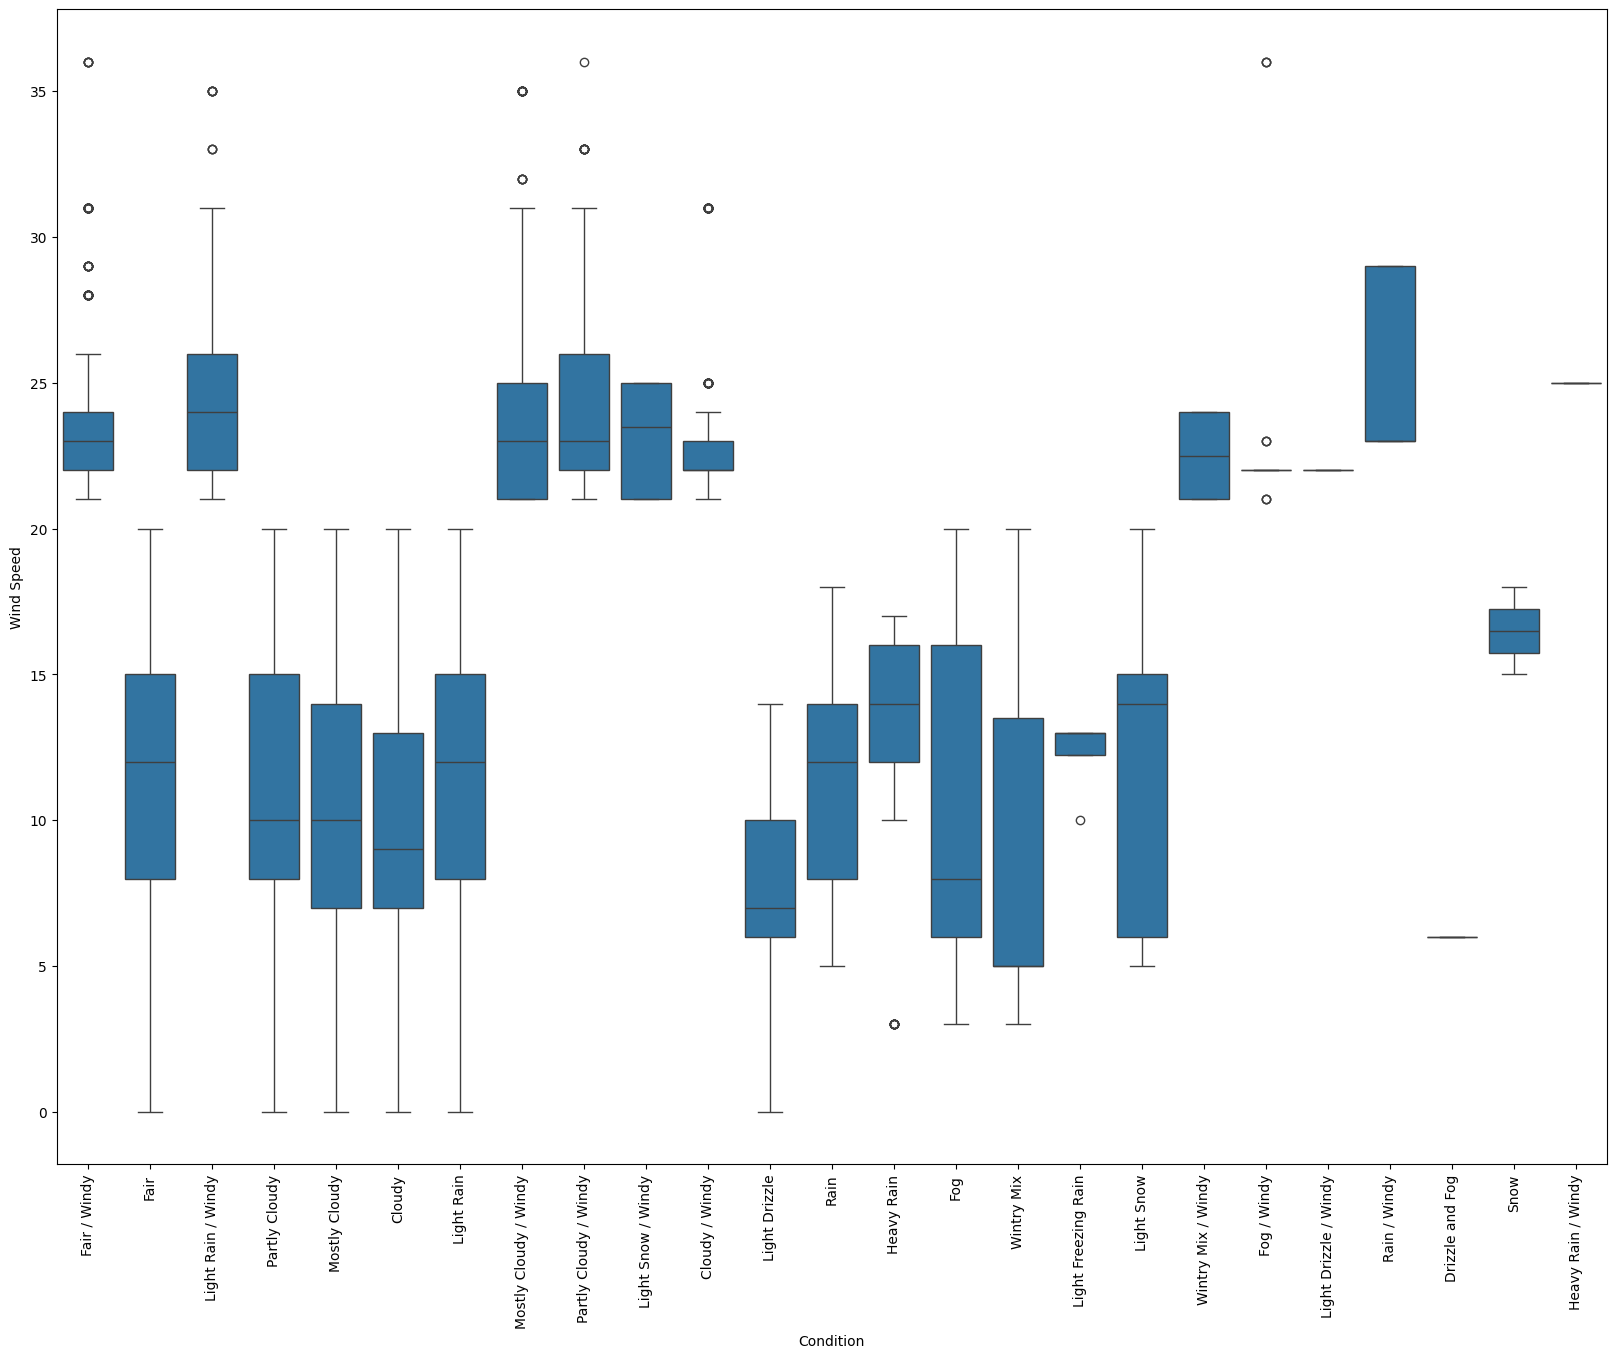

In [6]:
plt.figure(figsize=(20,15))
sns.boxplot(flights_df, x='Condition', y='Wind Speed')
plt.xticks(rotation=90)
plt.show()

In [7]:
flights_df[flights_df.isna().any(axis=1)]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
15156,12,19,4,B6,N648JB,FLL,60,189,1069,1275,1335,24,24,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,41
15157,12,19,4,9E,N136EV,PWM,3,83,273,1349,1352,1432,24,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,40


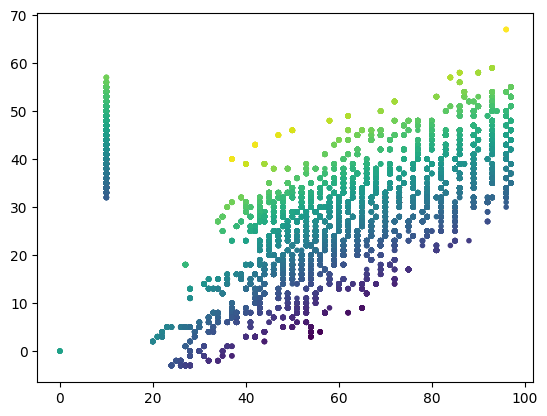

In [8]:
plt.scatter(flights_df['Humidity'], flights_df['Dew Point'], c=flights_df['Temperature'], marker='.')
plt.show()

In [9]:
flights_df.corr(numeric_only=True)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


0.9995823726185408


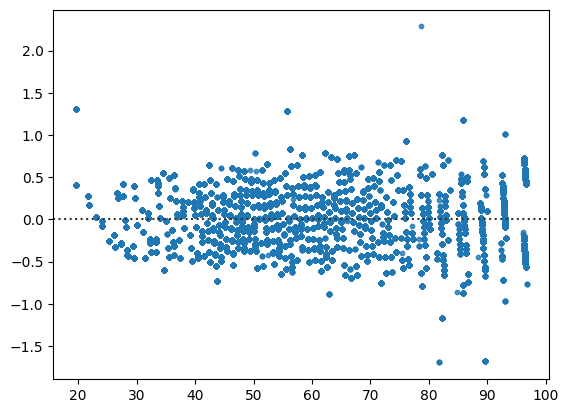

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def find_year(row):
    if row == 1:
        return 2020
    return 2019

def remove_windy(row):
    string = ' / Windy'
    if row[-8:] == string:
        return row[:-8]
    return row

datetime_dict = {'YEAR': 'year', 'MONTH': 'month', 'DAY_OF_MONTH': 'day'}
week_dict = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
test_df = flights_df.copy()
year = test_df['MONTH'].apply(find_year)
test_df.insert(0, 'YEAR', year)
date = pd.to_datetime(test_df[['YEAR', 'MONTH', 'DAY_OF_MONTH']].rename(columns=datetime_dict))
test_df.insert(0, 'DATE', date)
test_df = test_df.drop(['YEAR', 'MONTH', 'DAY_OF_MONTH'], axis=1)
test_df['DAY_OF_WEEK'] = test_df['DAY_OF_WEEK'].replace(week_dict)
test_df['Condition'] = test_df['Condition'].apply(remove_windy)
test_df = test_df.fillna('CALM')
week_encoded = pd.get_dummies(test_df['DAY_OF_WEEK'], dtype='int64').drop(['Mon'], axis=1)
carrier_encoded = pd.get_dummies(test_df['OP_UNIQUE_CARRIER'], dtype='int64').drop(['B6'], axis=1)
dest_encoded = pd.get_dummies(test_df['DEST'], dtype='int64').drop(['LAX'], axis=1)
wind_encoded = pd.get_dummies(test_df['Wind'], dtype='int64').drop(['CALM'], axis=1)
condition_encoded = pd.get_dummies(test_df['Condition'], dtype='int64').drop(['Fair'], axis=1)
test_df = pd.concat([test_df, week_encoded, carrier_encoded, dest_encoded, condition_encoded, wind_encoded], axis=1)
test_df.loc[test_df.Humidity == 0, 'Dew Point'] = 46

regression_df = test_df[~test_df.Humidity.isin([0,10])]

X = np.array(regression_df[['Temperature', 'Dew Point']])
y = np.array(regression_df['Humidity'])

poly = PolynomialFeatures(degree=3)
poly_X = poly.fit_transform(X)

model = LinearRegression()
model.fit(poly_X, y)

print(model.score(poly_X, y))
y_pred = model.predict(poly_X)
sns.residplot(x=y_pred, y=y, scatter_kws={'s': 10})
plt.show()

humidity_df = test_df[test_df.Humidity.isin([0,10])]

X = np.array(humidity_df[['Temperature', 'Dew Point']])
poly_X = poly.transform(X)
y = np.around(model.predict(poly_X))

test_df.loc[test_df.Humidity.isin([0,10]), 'Humidity'] = y

0.776509899347382


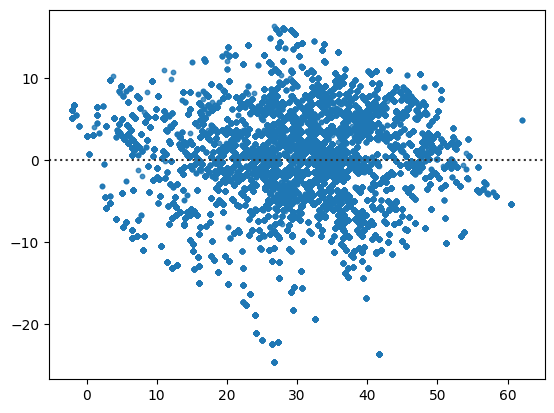

In [11]:
regression_df = test_df.loc[test_df.Humidity != 0]

X = np.array(regression_df.loc(axis=1)['Temperature', 'Pressure', 'Wind Speed', *wind_encoded.columns])
y = np.array(regression_df['Dew Point'])

model = LinearRegression()
model.fit(X, y)

X = np.array(regression_df.loc(axis=1)['Temperature', 'Pressure', 'Wind Speed', *wind_encoded.columns])
y_pred = model.predict(X)
print(model.score(X, y))

sns.residplot(x=y_pred, y=y, scatter_kws={'s': 10})
plt.show()

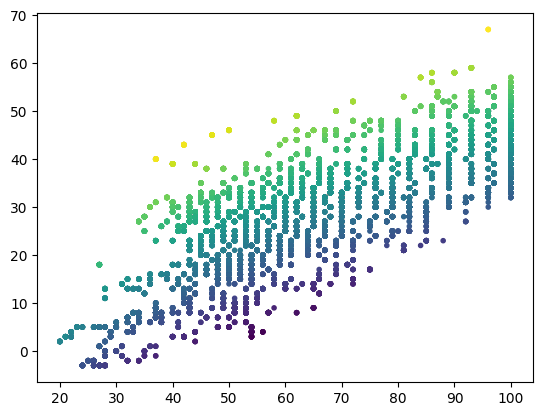

In [12]:
plt.scatter(test_df['Humidity'], test_df['Dew Point'], c=test_df['Temperature'], marker='.')
plt.show()

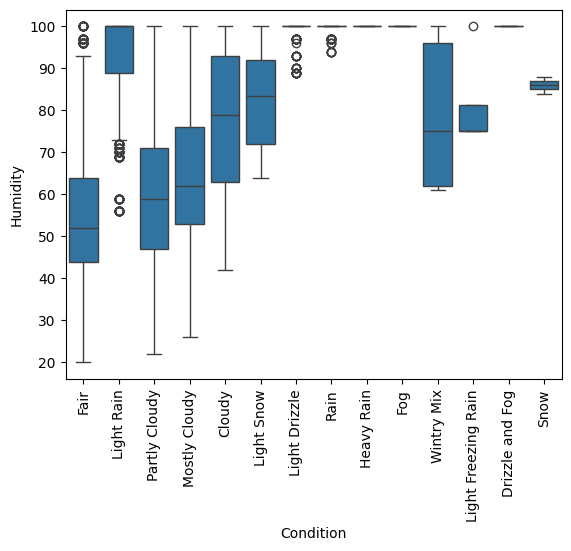

In [13]:
sns.boxplot(test_df, x='Condition', y='Humidity')
plt.xticks(rotation=90)
plt.show()

In [14]:
test_df

,DATE,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,Fri,Sat,Sun,Thu,Tue,Wed,9E,AA,AS,DL,HA,MQ,OO,YX,ABQ,ATL,AUS,BNA,BOS,BQN,BTV,BUF,BUR,BWI,CHS,CLE,CLT,CMH,CVG,DCA,DEN,DFW,DTW,EGE,FLL,HNL,IAD,IAH,IND,JAC,JAX,LAS,LGB,MCO,MIA,MSP,MSY,OAK,ONT,ORD,ORF,ORH,PBI,PDX,PHL,PHX,PIT,PSE,PSP,PWM,RDU,RIC,RNO,ROC,RSW,SAN,SAT,SAV,SEA,SFO,SJC,SJU,SLC,SMF,SRQ,STT,SYR,TPA,Cloudy,Drizzle and Fog,Fog,Heavy Rain,Light Drizzle,Light Freezing Rain,Light Rain,Light Snow,Mostly Cloudy,Partly Cloudy,Rain,Snow,Wintry Mix,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
0,2019-11-01,Fri,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair,9,17,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019-11-01,Fri,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair,9,17,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2019-11-01,Fri,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair,9,17,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019-11-01,Fri,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair,9,17,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-11-01,Fri,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair,9,17,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2020-01-31,Fri,B6,N216JB,ORH,2,57,150,1370,1372,1427,39,38,96,N,6,0,30.18,Cloudy,20,32,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
28816,2020-01-31,Fri,AA,N104NN,BOS,2,75,187,1390,1392,25,39,38,96,N,6,0,30.18,Cloudy,19,23,22,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
28817,2020-01-31,Fri,AS,N581AS,SEA,283,392,2422,1125,1408,1337,39,38,96,N,6,0,30.18,Cloudy,19,23,21,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
28818,2020-01-31,Fri,B6,N957JB,SJU,5,224,1598,1417,1422,261,39,38,96,N,6,0,30.18,Cloudy,19,23,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [15]:
test_df.iloc[:,:22].corr(numeric_only=True)

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
DEP_DELAY,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000170,0.033910,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007564,0.024963,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.010081,0.022974,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001015,-0.079087,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008357,-0.078099,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000751,-0.093552,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.788536,0.264991,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574
Dew Point,-0.000170,0.007564,0.010081,0.001015,0.008357,-0.000751,0.788536,1.000000,0.794401,-0.142837,-0.163525,-0.490272,0.013643,0.001888,0.011331
Humidity,0.033910,0.024963,0.022974,-0.079087,-0.078099,-0.093552,0.264991,0.794401,1.000000,-0.233083,-0.214298,-0.403860,0.035916,-0.058437,0.087851
Wind Speed,0.067718,-0.013440,-0.010734,0.008063,0.006033,0.014180,0.010603,-0.142837,-0.233083,1.000000,0.698795,-0.309978,-0.024948,-0.013499,0.062522


In [16]:
feature_df = test_df.drop([
    'DATE',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
    'TAIL_NUM',
    'DEST',
    'DISTANCE',
    'CRS_DEP_M',
    'CRS_ARR_M',
    'Dew Point',
    'Wind Gust',
    'Wind',
    'Condition',
    'TAXI_OUT'
], axis=1)

target_df = test_df['TAXI_OUT']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

X_transformer = PowerTransformer()
y_transformer = PowerTransformer()
poly = PolynomialFeatures(degree=4)

X = np.array(feature_df)
y = np.array(target_df).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_transformed = np.hstack((X_transformer.fit_transform(X_train[:,:7]), X_train[:,7:]))
poly_X_train = np.hstack((poly.fit_transform(X_train_transformed[:,:7]), X_train_transformed[:,7:]))
y_train_tranformed = y_transformer.fit_transform(y_train)

X_test_transformed = np.hstack((X_transformer.transform(X_test[:,:7]), X_test[:,7:]))
poly_X_test = np.hstack((poly.transform(X_test_transformed[:,:7]), X_test_transformed[:,7:]))
y_test_transformed = y_transformer.transform(y_test)

linear_model = LinearRegression()
linear_model.fit(poly_X_train, y_train_tranformed)
linear_model.score(poly_X_test, y_test_transformed)

0.15532268664212745

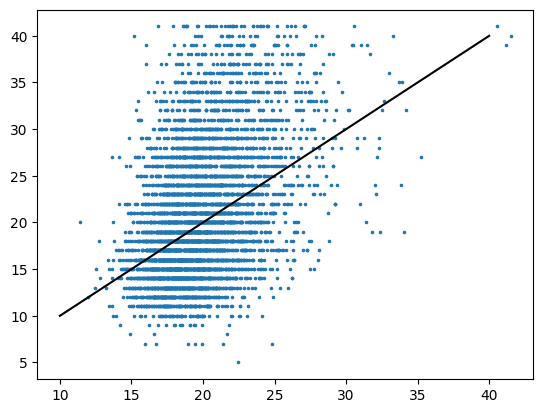

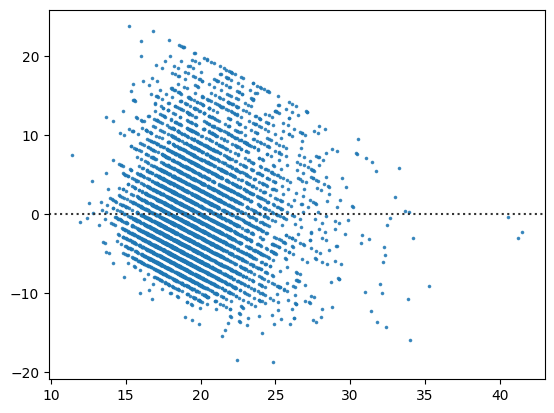

In [23]:
y_pred_transformed = linear_model.predict(poly_X_test)
y_pred = y_transformer.inverse_transform(y_pred_transformed)

plt.scatter(y_pred, y_test, marker='.', s=10)
plt.plot([10,40],[10,40], c='black')
plt.show()
sns.residplot(x=y_pred, y=y_test, scatter_kws={'marker': '.', 's':10})
plt.show()